In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

os.makedirs("figs", exist_ok=True)

fs   = 44100
f0   = 220.0
T0   = 1.0 / f0
dur  = 0.040
t    = np.arange(0, dur, 1/fs)

# three harmonics with gentle roll-off 
x = (0.7*np.sin(2*np.pi*f0*t) +
     0.25*np.sin(2*np.pi*2*f0*t) +
     0.10*np.sin(2*np.pi*3*f0*t))

def xt_shift(tt):  
    tt_wrapped = np.mod(tt, T0)
    t1 = np.arange(0, T0, 1/fs)
    x1 = (0.7*np.sin(2*np.pi*f0*t1) +
          0.25*np.sin(2*np.pi*2*f0*t1) +
          0.10*np.sin(2*np.pi*3*f0*t1))
    idx = np.minimum((tt_wrapped * fs).astype(int), len(t1)-1)
    return x1[idx]

x_rev   = xt_shift(-t) 
x_comp  = xt_shift(2*t)
x_exp   = xt_shift(0.5*t)
x_adv6  = xt_shift(t + 6.0)


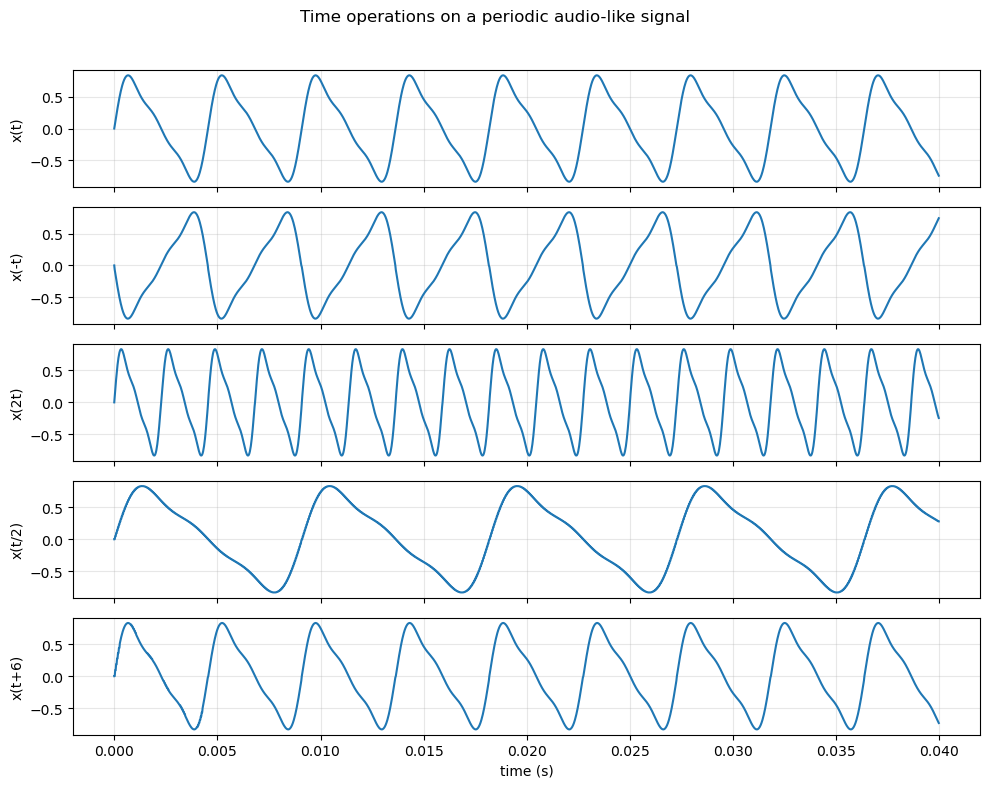

In [4]:
fig, axs = plt.subplots(5, 1, figsize=(10, 8), sharex=True)
axs[0].plot(t, x)
axs[0].set_ylabel("x(t)")
axs[1].plot(t, x_rev)
axs[1].set_ylabel("x(-t)")
axs[2].plot(t, x_comp)
axs[2].set_ylabel("x(2t)")
axs[3].plot(t, x_exp)
axs[3].set_ylabel("x(t/2)")
axs[4].plot(t, x_adv6)
axs[4].set_ylabel("x(t+6)")
axs[-1].set_xlabel("time (s)")
for ax in axs:
    ax.grid(True, alpha=0.3)
fig.suptitle("Time operations on a periodic audio-like signal")
fig.tight_layout(rect=[0, 0, 1, 0.96])
fig.savefig("figs/week2_ops.png", dpi=200)
plt.show()


P_inf(x)   = 0.281
P_inf(y_d) ≈ 0.470


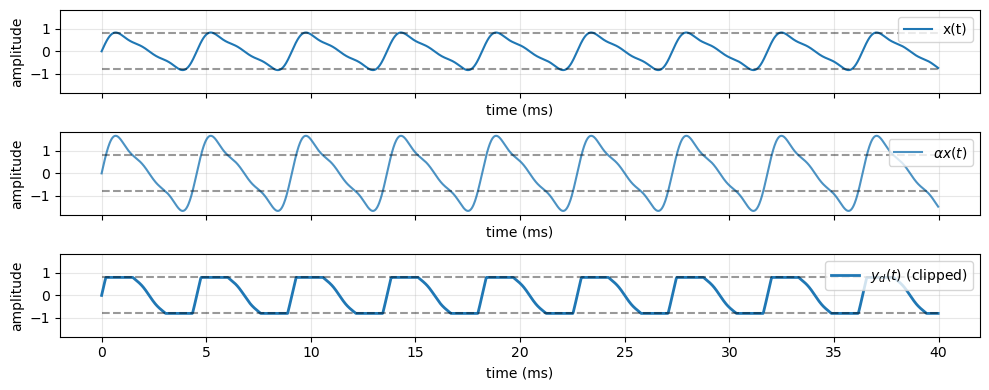

In [12]:

alpha = 2.0
beta  = 0.8

def hard_clip(u, beta):
    return np.clip(u, -beta, beta)

x_scaled = alpha * x
y_clip   = hard_clip(x_scaled, beta)

# power over one period: integrate |·|^2 over [0, T0]
# using high-res sampling across exactly one period
tP = np.arange(0, T0, 1/fs)
xP = (0.7*np.sin(2*np.pi*f0*tP) +
      0.25*np.sin(2*np.pi*2*f0*tP) +
      0.10*np.sin(2*np.pi*3*f0*tP))
yP = hard_clip(alpha * xP, beta)
P_x   = (1/T0) * np.trapz(np.abs(xP)**2, tP)
P_y   = (1/T0) * np.trapz(np.abs(yP)**2, tP)
print(f"P_inf(x)   = {P_x:.3f}")
print(f"P_inf(y_d) ≈ {P_y:.3f}")

# use three subplots (3, 1)
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 4), sharey=True, sharex=True)
axs[0].plot(t*1000, x, label="x(t)")
axs[1].plot(t*1000, x_scaled, label=r"$\alpha x(t)$", alpha=0.8)
axs[2].plot(t*1000, y_clip, label=r"$y_d(t)$ (clipped)", linewidth=2)
axs[0].hlines([ beta, -beta], xmin=t[0]*1000, xmax=t[-1]*1000, colors="k", linestyles="dashed", alpha=0.4)
axs[1].hlines([ beta, -beta], xmin=t[0]*1000, xmax=t[-1]*1000, colors="k", linestyles="dashed", alpha=0.4)
axs[2].hlines([ beta, -beta], xmin=t[0]*1000, xmax=t[-1]*1000, colors="k", linestyles="dashed", alpha=0.4)
axs[0].set_xlabel("time (ms)")
axs[0].set_ylabel("amplitude")
axs[0].grid(True, alpha=0.3)
axs[0].legend(loc="upper right")
axs[1].set_xlabel("time (ms)")
axs[1].set_ylabel("amplitude")
axs[1].grid(True, alpha=0.3)
axs[1].legend(loc="upper right")
axs[2].set_xlabel("time (ms)")
axs[2].set_ylabel("amplitude")
axs[2].grid(True, alpha=0.3)
axs[2].legend(loc="upper right")
# axs[0].set_title(f"Clipping demo: P_inf(x) ≈ {P_x:.3f},   P_inf(y_d) ≈ {P_y:.3f}  (periodic)")
fig.tight_layout()
fig.savefig("figs/week2_clip.png", dpi=200)
plt.show()
